In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pywt
import warnings
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras_preprocessing.sequence import pad_sequences
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D 
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import Dense, Dropout, Activation, Bidirectional
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import skew, kurtosis

In [2]:
dirA="./Datasets/setA/"
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)

dirB="./Datasets/setB/"
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirC="./Datasets/setC/"
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)

dirD="./Datasets/setD/"
tempD=[]
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tempA, tempB, tempC, tempD, tempE

(['./Datasets/setA/Z001.txt',
  './Datasets/setA/Z002.txt',
  './Datasets/setA/Z003.txt',
  './Datasets/setA/Z004.txt',
  './Datasets/setA/Z005.txt',
  './Datasets/setA/Z006.txt',
  './Datasets/setA/Z007.txt',
  './Datasets/setA/Z008.txt',
  './Datasets/setA/Z009.txt',
  './Datasets/setA/Z010.txt',
  './Datasets/setA/Z011.txt',
  './Datasets/setA/Z012.txt',
  './Datasets/setA/Z013.txt',
  './Datasets/setA/Z014.txt',
  './Datasets/setA/Z015.txt',
  './Datasets/setA/Z016.txt',
  './Datasets/setA/Z017.txt',
  './Datasets/setA/Z018.txt',
  './Datasets/setA/Z019.txt',
  './Datasets/setA/Z020.txt',
  './Datasets/setA/Z021.txt',
  './Datasets/setA/Z022.txt',
  './Datasets/setA/Z023.txt',
  './Datasets/setA/Z024.txt',
  './Datasets/setA/Z025.txt',
  './Datasets/setA/Z026.txt',
  './Datasets/setA/Z027.txt',
  './Datasets/setA/Z028.txt',
  './Datasets/setA/Z029.txt',
  './Datasets/setA/Z030.txt',
  './Datasets/setA/Z031.txt',
  './Datasets/setA/Z032.txt',
  './Datasets/setA/Z033.txt',
  './Datas

In [4]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [5]:
ta, tb, tc, td, te

([      A0
  0     12
  1     22
  2     35
  3     45
  4     69
  ...   ..
  4092 -25
  4093 -28
  4094 -11
  4095   8
  4096  77
  
  [4097 rows x 1 columns],
         A1
  0     -56
  1     -50
  2     -64
  3     -91
  4    -135
  ...   ...
  4092 -172
  4093 -180
  4094 -173
  4095 -162
  4096  -82
  
  [4097 rows x 1 columns],
        A2
  0    -37
  1    -22
  2    -17
  3    -24
  4    -31
  ...   ..
  4092  -3
  4093   7
  4094   3
  4095   4
  4096  82
  
  [4097 rows x 1 columns],
        A3
  0    -31
  1    -43
  2    -39
  3    -39
  4     -9
  ...   ..
  4092  11
  4093  12
  4094  -6
  4095  10
  4096  33
  
  [4097 rows x 1 columns],
        A4
  0     14
  1     26
  2     32
  3     25
  4     16
  ...   ..
  4092 -55
  4093 -58
  4094 -32
  4095  -6
  4096 -17
  
  [4097 rows x 1 columns],
        A5
  0    -87
  1    -89
  2    -73
  3    -69
  4    -51
  ...   ..
  4092  32
  4093  37
  4094  18
  4095   7
  4096   7
  
  [4097 rows x 1 columns],
        A6
  0  

In [6]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [7]:
bigA=table(ta)
bigB=table(tb)
bigC=table(tc)
bigD=table(td)
bigE=table(te)

head=list(bigA.columns.values)

In [8]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [9]:
matA = creat_mat(bigA)
matB = creat_mat(bigB)
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) 

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

In [10]:
matA.shape, matB.shape, matC.shape, matD.shape, matE.shape

((4097, 100), (4097, 100), (4097, 100), (4097, 100), (4097, 100))

In [11]:
matA_out = np.zeros((1,100))
X_data_A = np.concatenate((matA,matA_out), axis = 0) 
print(X_data_A.shape)

(4098, 100)


In [12]:
matB_out = np.ones((1,100))
X_data_B = np.concatenate((matB,matB_out), axis = 0) 
print(X_data_B.shape)

(4098, 100)


In [13]:
matC_out = np.full((1,100),[2])
X_data_C = np.concatenate((matC,matC_out), axis = 0) 
print(X_data_C.shape)

(4098, 100)


In [14]:
matD_out = np.full((1,100),[3])
X_data_D = np.concatenate((matD,matD_out), axis = 0) 
print(X_data_D.shape)

(4098, 100)


In [15]:
matE_out = np.full((1,100),[4])
X_data_E = np.concatenate((matE,matE_out), axis = 0) 
print(X_data_E.shape)

(4098, 100)


In [16]:
data = np.concatenate((X_data_A,X_data_B,X_data_C,X_data_D,X_data_E), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [17]:
TotalData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A4088,A4089,A4090,A4091,A4092,A4093,A4094,A4095,A4096,out
S0,12.0,22.0,35.0,45.0,69.0,74.0,79.0,78.0,66.0,43.0,...,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0,77.0,0.0
S1,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,...,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,-82.0,0.0
S2,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,...,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,82.0,0.0
S3,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,...,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,33.0,0.0
S4,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,...,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S495,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,...,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0,4.0
S496,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,...,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0,4.0
S497,-438.0,-561.0,-622.0,-581.0,-460.0,-295.0,-164.0,-70.0,3.0,66.0,...,443.0,399.0,319.0,196.0,40.0,-47.0,-118.0,-163.0,-56.0,4.0
S498,-476.0,-518.0,-521.0,-362.0,-68.0,175.0,289.0,184.0,15.0,-130.0,...,-261.0,-248.0,-147.0,36.0,224.0,299.0,246.0,556.0,276.0,4.0


In [18]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

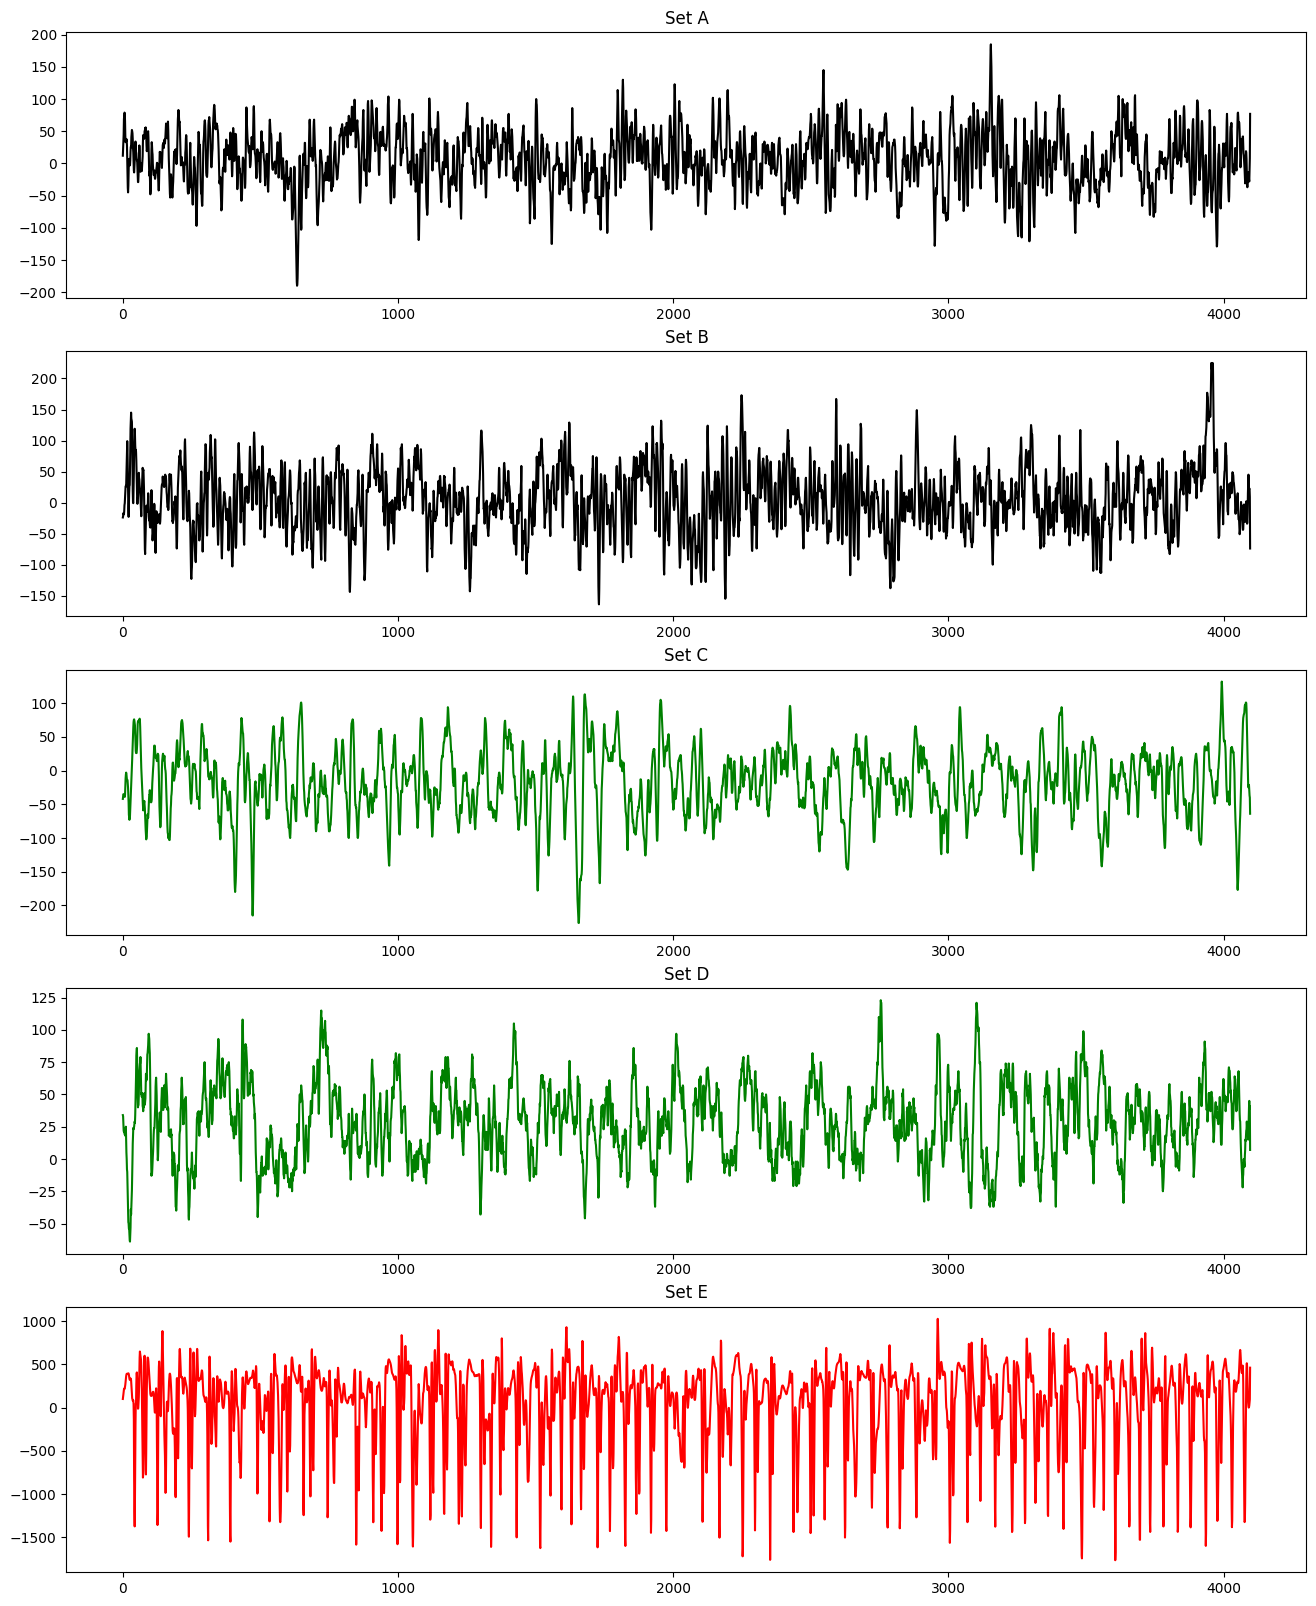

In [19]:
samples = np.arange(0,4097,1)
plt.figure(figsize=(16,20))
plt.subplot(5,1,1)
plt.title('Set A')
plt.plot(samples,matA[:,0], label = 'Non-Seizure',color='black')
plt.subplot(5,1,2)
plt.title('Set B')
plt.plot(samples,matB[:,0], label = 'Non_seizure',color='black')
plt.subplot(5,1,3)
plt.title('Set C')
plt.plot(samples,matC[:,0], label = 'Interictal',color='green')
plt.subplot(5,1,4)
plt.title('Set D')
plt.plot(samples,matD[:,0], label = 'Interictal',color='green')
plt.subplot(5,1,5)
plt.title('Set E')
plt.plot(samples,matE[:,0], label = 'Seizure',color='red')
plt.show()

In [20]:
final_values = []

In [21]:
filters = pywt.wavelist()
print(filters)
print(len(filters))
level =5
w_name = 'bior4.4'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [22]:
w = pywt.Wavelet(w_name)
temp_cA_A  = []
temp_cD5_A = []
temp_cD4_A = []
temp_cD3_A = []
temp_cD2_A = []
temp_cD1_A = []
for i in matA.T:
  cA_A,cD5_A,cD4_A,cD3_A,cD2_A,cD1_A = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_A.append(cA_A)
  temp_cD1_A.append(cD1_A)
  temp_cD2_A.append(cD2_A)
  temp_cD3_A.append(cD3_A)
  temp_cD4_A.append(cD4_A)
  temp_cD5_A.append(cD5_A)
coeff_cA_A  = np.array(temp_cA_A)
coeff_cD1_A = np.array(temp_cD1_A)
coeff_cD2_A = np.array(temp_cD2_A)
coeff_cD3_A = np.array(temp_cD3_A)
coeff_cD4_A = np.array(temp_cD4_A)
coeff_cD5_A = np.array(temp_cD5_A)

In [23]:
w = pywt.Wavelet(w_name)
temp_cA_B  = []
temp_cD5_B = []
temp_cD4_B = []
temp_cD3_B = []
temp_cD2_B = []
temp_cD1_B = []
for i in matB.T:
  cA_B,cD5_B,cD4_B,cD3_B,cD2_B,cD1_B = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_B.append(cA_B)
  temp_cD1_B.append(cD1_B)
  temp_cD2_B.append(cD2_B)
  temp_cD3_B.append(cD3_B)
  temp_cD4_B.append(cD4_B)
  temp_cD5_B.append(cD5_B)
coeff_cA_B  = np.array(temp_cA_B)
coeff_cD1_B = np.array(temp_cD1_B)
coeff_cD2_B = np.array(temp_cD2_B)
coeff_cD3_B = np.array(temp_cD3_B)
coeff_cD4_B = np.array(temp_cD4_B)
coeff_cD5_B = np.array(temp_cD5_B)

In [24]:
w = pywt.Wavelet(w_name)
temp_cA_C  = []
temp_cD5_C = []
temp_cD4_C = []
temp_cD3_C = []
temp_cD2_C = []
temp_cD1_C = []
for i in matC.T:
  cA_C,cD5_C,cD4_C,cD3_C,cD2_C,cD1_C = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_C.append(cA_C)
  temp_cD1_C.append(cD1_C)
  temp_cD2_C.append(cD2_C)
  temp_cD3_C.append(cD3_C)
  temp_cD4_C.append(cD4_C)
  temp_cD5_C.append(cD5_C)
coeff_cA_C  = np.array(temp_cA_C)
coeff_cD1_C = np.array(temp_cD1_C)
coeff_cD2_C = np.array(temp_cD2_C)
coeff_cD3_C = np.array(temp_cD3_C)
coeff_cD4_C = np.array(temp_cD4_C)
coeff_cD5_C = np.array(temp_cD5_C)

In [25]:
w = pywt.Wavelet(w_name)
temp_cA_D  = []
temp_cD5_D = []
temp_cD4_D = []
temp_cD3_D = []
temp_cD2_D = []
temp_cD1_D = []
for i in matD.T:
  cA_D,cD5_D,cD4_D,cD3_D,cD2_D,cD1_D = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_D.append(cA_D)
  temp_cD1_D.append(cD1_D)
  temp_cD2_D.append(cD2_D)
  temp_cD3_D.append(cD3_D)
  temp_cD4_D.append(cD4_D)
  temp_cD5_D.append(cD5_D)
coeff_cA_D  = np.array(temp_cA_D)
coeff_cD1_D = np.array(temp_cD1_D)
coeff_cD2_D = np.array(temp_cD2_D)
coeff_cD3_D = np.array(temp_cD3_D)
coeff_cD4_D = np.array(temp_cD4_D)
coeff_cD5_D = np.array(temp_cD5_D)

In [26]:
w = pywt.Wavelet(w_name)
temp_cA_E  = []
temp_cD5_E = []
temp_cD4_E = []
temp_cD3_E = []
temp_cD2_E = []
temp_cD1_E = []
for i in matE.T:
  cA_E,cD5_E,cD4_E,cD3_E,cD2_E,cD1_E = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_E.append(cA_E)
  temp_cD1_E.append(cD1_E)
  temp_cD2_E.append(cD2_E)
  temp_cD3_E.append(cD3_E)
  temp_cD4_E.append(cD4_E)
  temp_cD5_E.append(cD5_E)
coeff_cA_E  = np.array(temp_cA_E)
coeff_cD1_E = np.array(temp_cD1_E)
coeff_cD2_E = np.array(temp_cD2_E)
coeff_cD3_E = np.array(temp_cD3_E)
coeff_cD4_E = np.array(temp_cD4_E)
coeff_cD5_E = np.array(temp_cD5_E)

In [27]:
#SET A
print(coeff_cA_A.shape)
print(coeff_cD5_A.shape)
print(coeff_cD4_A.shape)
print(coeff_cD3_A.shape)
print(coeff_cD2_A.shape)
print(coeff_cD1_A.shape)

#SET B
print(coeff_cA_B.shape)
print(coeff_cD5_B.shape)
print(coeff_cD4_B.shape)
print(coeff_cD3_B.shape)
print(coeff_cD2_B.shape)
print(coeff_cD1_B.shape)

#SET C
print(coeff_cA_C.shape)
print(coeff_cD5_C.shape)
print(coeff_cD4_C.shape)
print(coeff_cD3_C.shape)
print(coeff_cD2_C.shape)
print(coeff_cD1_C.shape)

#SET D
print(coeff_cA_D.shape)
print(coeff_cD5_D.shape)
print(coeff_cD4_D.shape)
print(coeff_cD3_D.shape)
print(coeff_cD2_D.shape)
print(coeff_cD1_D.shape)

#SET E
print(coeff_cA_E.shape)
print(coeff_cD5_E.shape)
print(coeff_cD4_E.shape)
print(coeff_cD3_E.shape)
print(coeff_cD2_E.shape)
print(coeff_cD1_E.shape)

(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)
(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)
(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)
(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)
(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)


In [28]:
coeff_cA_total = np.concatenate([coeff_cA_A, coeff_cA_B, coeff_cA_C, coeff_cA_D, coeff_cA_E])
coeff_cD1_total = np.concatenate([coeff_cD1_A, coeff_cD1_B, coeff_cD1_C, coeff_cD1_D, coeff_cD1_E])
coeff_cD2_total = np.concatenate([coeff_cD2_A, coeff_cD2_B, coeff_cD2_C, coeff_cD2_D, coeff_cD2_E])
coeff_cD3_total = np.concatenate([coeff_cD3_A, coeff_cD3_B, coeff_cD3_C, coeff_cD3_D, coeff_cD3_E])
coeff_cD4_total = np.concatenate([coeff_cD4_A, coeff_cD4_B, coeff_cD4_C, coeff_cD4_D, coeff_cD4_E])
coeff_cD5_total = np.concatenate([coeff_cD5_A, coeff_cD5_B, coeff_cD5_C, coeff_cD5_D, coeff_cD5_E])

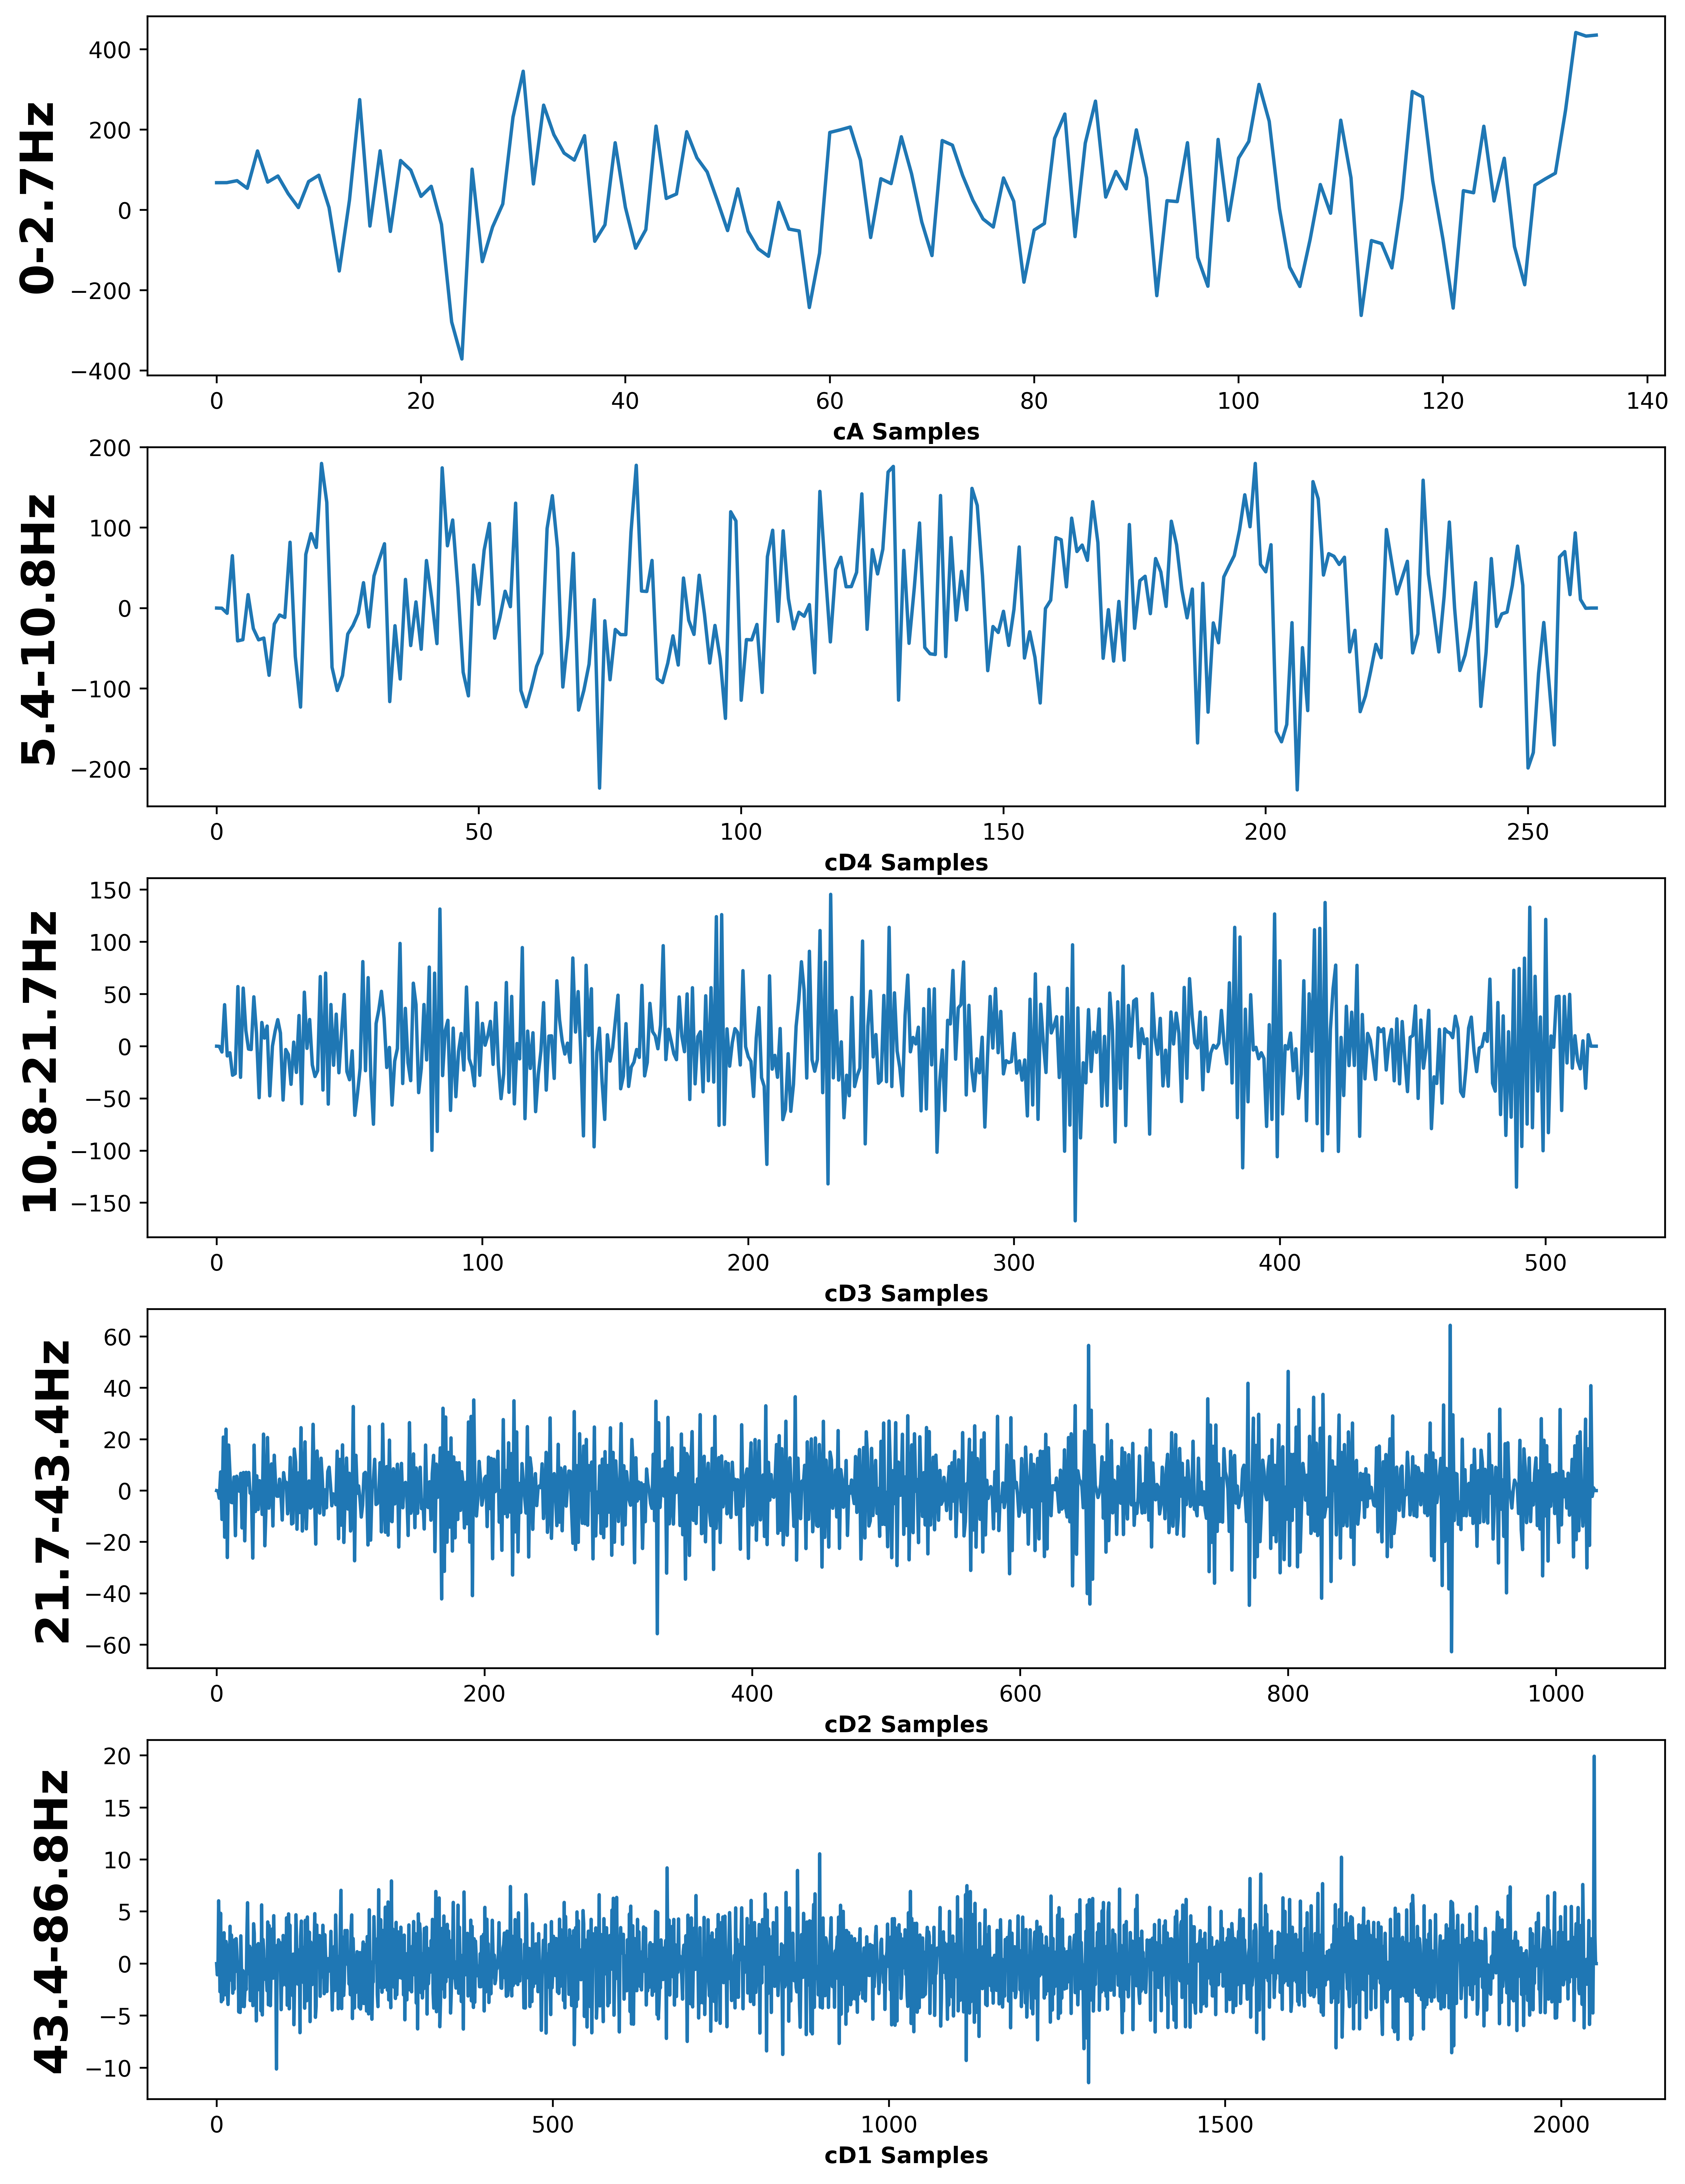

In [29]:
plt.figure(figsize=(12,20),dpi=500)
plt.subplot(level+1,1,1)
plt.ylabel('0-2.7Hz', size=20,weight='bold')
plt.xlabel('cA Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cA_total[0]),1),coeff_cA_total[0,:].T)

# plt.subplot(level+1,1,2)
# plt.ylabel('2.7-5.4Hz', size=20,weight='bold')
# plt.xlabel('cD5 Samples', size=10,weight='bold')
# plt.plot(np.arange(0,len(coeff_cD5_total[0]),1),coeff_cD5_total[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('5.4-10.8Hz', size=20,weight='bold')
plt.xlabel('cD4 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD4_total[0]),1),coeff_cD4_total[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('10.8-21.7Hz', size=20,weight='bold')
plt.xlabel('cD3 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD3_total[0]),1),coeff_cD3_total[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('21.7-43.4Hz', size=20,weight='bold')
plt.xlabel('cD2 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD2_total[0]),1),coeff_cD2_total[0,:].T)

plt.subplot(level+1,1,5)
plt.ylabel('43.4-86.8Hz', size=20,weight='bold')
plt.xlabel('cD1 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD1_total[0]),1),coeff_cD1_total[0,:].T)

plt.savefig('sub-frequency_bands.png')

plt.show()

In [30]:
feature_size = 4
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [31]:
def build_features(mat):
    lis = list()
    lis = lis + [skew(mat)]
    lis = lis + [np.var(mat)]
    lis = lis + [np.ptp(mat)]
    lis = lis + [np.std(mat)]
    sleep(0.01)
             
    return lis

In [32]:
# create features of class I and cA
f1_cA_A    = np.zeros((100,1))
f2_cA_A    = np.zeros((100,1))
f3_cA_A    = np.zeros((100,1))
f4_cA_A    = np.zeros((100,1))

for i in range(100):
    [f1_cA_A[i,0],f2_cA_A[i,0],f3_cA_A[i,0],f4_cA_A[i,0]]=build_features(coeff_cA_A.T[:,i])

# # create features of class I and cD1
# f1_cD1_A    = np.zeros((100,1))
# f2_cD1_A    = np.zeros((100,1))
# f3_cD1_A    = np.zeros((100,1))
# f4_cD1_A    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_A[i,0],f2_cD1_A[i,0],f3_cD1_A[i,0],f4_cD1_A[i,0]]=build_features(coeff_cD1_A.T[:,i])
  
# create features of class I and cD1
f1_cD2_A   = np.zeros((100,1))
f2_cD2_A   = np.zeros((100,1))
f3_cD2_A   = np.zeros((100,1))
f4_cD2_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_A[i,0],f2_cD2_A[i,0],f3_cD2_A[i,0],f4_cD2_A[i,0]]=build_features(coeff_cD2_A.T[:,i])

# create features of class I and cD3
f1_cD3_A   = np.zeros((100,1))
f2_cD3_A   = np.zeros((100,1))
f3_cD3_A   = np.zeros((100,1))
f4_cD3_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_A[i,0],f2_cD3_A[i,0],f3_cD3_A[i,0],f4_cD3_A[i,0]]=build_features(coeff_cD3_A.T[:,i])

# create features of class I and cD4
f1_cD4_A   = np.zeros((100,1))
f2_cD4_A   = np.zeros((100,1))
f3_cD4_A   = np.zeros((100,1))
f4_cD4_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_A[i,0],f2_cD4_A[i,0],f3_cD4_A[i,0],f4_cD4_A[i,0]]=build_features(coeff_cD4_A.T[:,i])
    
# create features of class I and cD5
f1_cD5_A   = np.zeros((100,1))
f2_cD5_A   = np.zeros((100,1))
f3_cD5_A   = np.zeros((100,1))
f4_cD5_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_A[i,0],f2_cD5_A[i,0],f3_cD5_A[i,0],f4_cD5_A[i,0]]=build_features(coeff_cD5_A.T[:,i])

In [33]:
# create features of class II and cA
f1_cA_B    = np.zeros((100,1))
f2_cA_B    = np.zeros((100,1))
f3_cA_B    = np.zeros((100,1))
f4_cA_B    = np.zeros((100,1))

for i in range(100):
    [f1_cA_B[i,0],f2_cA_B[i,0],f3_cA_B[i,0],f4_cA_B[i,0]]=build_features(coeff_cA_B.T[:,i])

# # create features of class II and cD1
# f1_cD1_B    = np.zeros((100,1))
# f2_cD1_B    = np.zeros((100,1))
# f3_cD1_B    = np.zeros((100,1))
# f4_cD1_B    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_B[i,0],f2_cD1_B[i,0],f3_cD1_B[i,0],f4_cD1_B[i,0]]=build_features(coeff_cD1_B.T[:,i])
  
# create features of class II and cD1
f1_cD2_B   = np.zeros((100,1))
f2_cD2_B   = np.zeros((100,1))
f3_cD2_B   = np.zeros((100,1))
f4_cD2_B   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_B[i,0],f2_cD2_B[i,0],f3_cD2_B[i,0],f4_cD2_B[i,0]]=build_features(coeff_cD2_B.T[:,i])

# create features of class II and cD3
f1_cD3_B   = np.zeros((100,1))
f2_cD3_B   = np.zeros((100,1))
f3_cD3_B   = np.zeros((100,1))
f4_cD3_B   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_B[i,0],f2_cD3_B[i,0],f3_cD3_B[i,0],f4_cD3_B[i,0]]=build_features(coeff_cD3_B.T[:,i])

# create features of class II and cD4
f1_cD4_B   = np.zeros((100,1))
f2_cD4_B   = np.zeros((100,1))
f3_cD4_B   = np.zeros((100,1))
f4_cD4_B   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_B[i,0],f2_cD4_B[i,0],f3_cD4_B[i,0],f4_cD4_B[i,0]]=build_features(coeff_cD4_B.T[:,i])
    
# create features of class I and cD5
f1_cD5_B   = np.zeros((100,1))
f2_cD5_B   = np.zeros((100,1))
f3_cD5_B   = np.zeros((100,1))
f4_cD5_B   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_B[i,0],f2_cD5_B[i,0],f3_cD5_B[i,0],f4_cD5_B[i,0]]=build_features(coeff_cD5_B.T[:,i])

In [34]:
# create features of class III and cA
f1_cA_C    = np.zeros((100,1))
f2_cA_C    = np.zeros((100,1))
f3_cA_C    = np.zeros((100,1))
f4_cA_C    = np.zeros((100,1))

for i in range(100):
    [f1_cA_C[i,0],f2_cA_C[i,0],f3_cA_C[i,0],f4_cA_C[i,0]]=build_features(coeff_cA_C.T[:,i])

# # create features of class I and cD1
# f1_cD1_C    = np.zeros((100,1))
# f2_cD1_C    = np.zeros((100,1))
# f3_cD1_C    = np.zeros((100,1))
# f4_cD1_C    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_C[i,0],f2_cD1_C[i,0],f3_cD1_C[i,0],f4_cD1_C[i,0]]=build_features(coeff_cD1_C.T[:,i])
  
# create features of class I and cD1
f1_cD2_C   = np.zeros((100,1))
f2_cD2_C   = np.zeros((100,1))
f3_cD2_C   = np.zeros((100,1))
f4_cD2_C   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_C[i,0],f2_cD2_C[i,0],f3_cD2_C[i,0],f4_cD2_C[i,0]]=build_features(coeff_cD2_C.T[:,i])

# create features of class I and cD3
f1_cD3_C   = np.zeros((100,1))
f2_cD3_C   = np.zeros((100,1))
f3_cD3_C   = np.zeros((100,1))
f4_cD3_C   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_C[i,0],f2_cD3_C[i,0],f3_cD3_C[i,0],f4_cD3_C[i,0]]=build_features(coeff_cD3_C.T[:,i])

# create features of class I and cD4
f1_cD4_C   = np.zeros((100,1))
f2_cD4_C   = np.zeros((100,1))
f3_cD4_C   = np.zeros((100,1))
f4_cD4_C   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_C[i,0],f2_cD4_C[i,0],f3_cD4_C[i,0],f4_cD4_C[i,0]]=build_features(coeff_cD4_C.T[:,i])
    
# create features of class I and cD5
f1_cD5_C   = np.zeros((100,1))
f2_cD5_C   = np.zeros((100,1))
f3_cD5_C   = np.zeros((100,1))
f4_cD5_C   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_C[i,0],f2_cD5_C[i,0],f3_cD5_C[i,0],f4_cD5_C[i,0]]=build_features(coeff_cD5_C.T[:,i])

In [35]:
# create features of class I and cA
f1_cA_D    = np.zeros((100,1))
f2_cA_D    = np.zeros((100,1))
f3_cA_D    = np.zeros((100,1))
f4_cA_D    = np.zeros((100,1))

for i in range(100):
    [f1_cA_D[i,0],f2_cA_D[i,0],f3_cA_D[i,0],f4_cA_D[i,0]]=build_features(coeff_cA_D.T[:,i])

# # create features of class I and cD1
# f1_cD1_D    = np.zeros((100,1))
# f2_cD1_D    = np.zeros((100,1))
# f3_cD1_D    = np.zeros((100,1))
# f4_cD1_D    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_D[i,0],f2_cD1_D[i,0],f3_cD1_D[i,0],f4_cD1_D[i,0]]=build_features(coeff_cD1_D.T[:,i])
  
# create features of class I and cD1
f1_cD2_D   = np.zeros((100,1))
f2_cD2_D   = np.zeros((100,1))
f3_cD2_D   = np.zeros((100,1))
f4_cD2_D   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_D[i,0],f2_cD2_D[i,0],f3_cD2_D[i,0],f4_cD2_D[i,0]]=build_features(coeff_cD2_D.T[:,i])

# create features of class I and cD3
f1_cD3_D   = np.zeros((100,1))
f2_cD3_D   = np.zeros((100,1))
f3_cD3_D   = np.zeros((100,1))
f4_cD3_D   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_D[i,0],f2_cD3_D[i,0],f3_cD3_D[i,0],f4_cD3_D[i,0]]=build_features(coeff_cD3_D.T[:,i])

# create features of class I and cD4
f1_cD4_D   = np.zeros((100,1))
f2_cD4_D   = np.zeros((100,1))
f3_cD4_D   = np.zeros((100,1))
f4_cD4_D   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_D[i,0],f2_cD4_D[i,0],f3_cD4_D[i,0],f4_cD4_D[i,0]]=build_features(coeff_cD4_D.T[:,i])
    
# create features of class I and cD5
f1_cD5_D   = np.zeros((100,1))
f2_cD5_D   = np.zeros((100,1))
f3_cD5_D   = np.zeros((100,1))
f4_cD5_D   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_D[i,0],f2_cD5_D[i,0],f3_cD5_D[i,0],f4_cD5_D[i,0]]=build_features(coeff_cD5_D.T[:,i])

In [36]:
# create features of class I and cA
f1_cA_E    = np.zeros((100,1))
f2_cA_E    = np.zeros((100,1))
f3_cA_E    = np.zeros((100,1))
f4_cA_E    = np.zeros((100,1))

for i in range(100):
    [f1_cA_E[i,0],f2_cA_E[i,0],f3_cA_E[i,0],f4_cA_E[i,0]]=build_features(coeff_cA_E.T[:,i])

# # create features of class I and cD1
# f1_cD1_E    = np.zeros((100,1))
# f2_cD1_E    = np.zeros((100,1))
# f3_cD1_E    = np.zeros((100,1))
# f4_cD1_E    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_E[i,0],f2_cD1_E[i,0],f3_cD1_E[i,0],f4_cD1_E[i,0]]=build_features(coeff_cD1_E.T[:,i])
  
# create features of class I and cD1
f1_cD2_E   = np.zeros((100,1))
f2_cD2_E   = np.zeros((100,1))
f3_cD2_E   = np.zeros((100,1))
f4_cD2_E   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_E[i,0],f2_cD2_E[i,0],f3_cD2_E[i,0],f4_cD2_E[i,0]]=build_features(coeff_cD2_E.T[:,i])

# create features of class I and cD3
f1_cD3_E   = np.zeros((100,1))
f2_cD3_E   = np.zeros((100,1))
f3_cD3_E   = np.zeros((100,1))
f4_cD3_E   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_E[i,0],f2_cD3_E[i,0],f3_cD3_E[i,0],f4_cD3_E[i,0]]=build_features(coeff_cD3_E.T[:,i])

# create features of class I and cD4
f1_cD4_E   = np.zeros((100,1))
f2_cD4_E   = np.zeros((100,1))
f3_cD4_E   = np.zeros((100,1))
f4_cD4_E   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_E[i,0],f2_cD4_E[i,0],f3_cD4_E[i,0],f4_cD4_E[i,0]]=build_features(coeff_cD4_E.T[:,i])
    
# create features of class I and cD5
f1_cD5_E   = np.zeros((100,1))
f2_cD5_E   = np.zeros((100,1))
f3_cD5_E   = np.zeros((100,1))
f4_cD5_E   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_E[i,0],f2_cD5_E[i,0],f3_cD5_E[i,0],f4_cD5_E[i,0]]=build_features(coeff_cD5_E.T[:,i])

In [37]:
cl_A  = np.zeros((100,1))
cl_B  = np.ones((100,1))
cl_C  = np.full((100,1),[2])
cl_D  = np.full((100,1),[3])
cl_E  = np.full((100,1),[4])

In [38]:
MftA = np.concatenate([f1_cA_A, f2_cA_A, f3_cA_A, f4_cA_A,f1_cD2_A,f2_cD2_A,f3_cD2_A,f4_cD2_A,f1_cD3_A,f2_cD3_A,f3_cD3_A,f4_cD3_A,f1_cD4_A,f2_cD4_A,f3_cD4_A,f4_cD4_A,f1_cD5_A,f2_cD5_A,f3_cD5_A,f4_cD5_A,cl_A], axis=1)

MftB = np.concatenate([f1_cA_B, f2_cA_B, f3_cA_B, f4_cA_B,f1_cD2_B,f2_cD2_B,f3_cD2_B,f4_cD2_B,f1_cD3_B,f2_cD3_B,f3_cD3_B,f4_cD3_B,f1_cD4_B,f2_cD4_B,f3_cD4_B,f4_cD4_B,f1_cD5_B,f2_cD5_B,f3_cD5_B,f4_cD5_B,cl_B], axis=1)

MftC = np.concatenate([f1_cA_C, f2_cA_C, f3_cA_C, f4_cA_C,f1_cD2_C,f2_cD2_C,f3_cD2_C,f4_cD2_C,f1_cD3_C,f2_cD3_C,f3_cD3_C,f4_cD3_C,f1_cD4_C,f2_cD4_C,f3_cD4_C,f4_cD4_C,f1_cD5_C,f2_cD5_C,f3_cD5_C,f4_cD5_C,cl_C], axis=1)

MftD = np.concatenate([f1_cA_D, f2_cA_D, f3_cA_D, f4_cA_D,f1_cD2_D,f2_cD2_D,f3_cD2_D,f4_cD2_D,f1_cD3_D,f2_cD3_D,f3_cD3_D,f4_cD3_D,f1_cD4_D,f2_cD4_D,f3_cD4_D,f4_cD4_D,f1_cD5_D,f2_cD5_D,f3_cD5_D,f4_cD5_D,cl_D], axis=1)

MftE = np.concatenate([f1_cA_E, f2_cA_E, f3_cA_E, f4_cA_E,f1_cD2_E,f2_cD2_E,f3_cD2_E,f4_cD2_E,f1_cD3_E,f2_cD3_E,f3_cD3_E,f4_cD3_E,f1_cD4_E,f2_cD4_E,f3_cD4_E,f4_cD4_E,f1_cD5_E,f2_cD5_E,f3_cD5_E,f4_cD5_E,cl_E], axis=1)

In [39]:
FCM_A  = pd.DataFrame(MftA,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_B  = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_C  = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_D  = pd.DataFrame(MftD,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_E  = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

In [40]:
FCM_A, FCM_B, FCM_C, FCM_D, FCM_E

(          f1            f2          f3          f4        f5          f6  \
 0   0.032633  21172.933120  813.219464  145.509220 -0.025764  245.995967   
 1  -0.365315  18874.726194  864.499500  137.385320  0.117051  441.018732   
 2   0.336624  31004.286191  956.997629  176.080340  0.079155  262.614740   
 3   0.031045  14303.711381  654.614523  119.598124  0.049144  820.089028   
 4   0.251737  24385.547125  755.785458  156.158724 -0.055442  311.173237   
 ..       ...           ...         ...         ...       ...         ...   
 95 -0.445358  23344.465338  919.921580  152.788957 -0.027330  370.580753   
 96 -0.513858  19305.339551  809.058433  138.943656  0.057687  288.635260   
 97 -0.109222  21528.744473  914.650399  146.726768  0.017092  217.979286   
 98  0.975474  23773.059483  780.736609  154.185147  0.038039  682.412961   
 99  0.187905  18755.892619  816.635405  136.952154  0.060103  287.873018   
 
             f7         f8        f9          f10  ...        f12       f1

In [41]:
TotalDataset = pd.concat([FCM_A,FCM_B,FCM_C,FCM_D,FCM_E],ignore_index=True)

In [42]:
print(TotalDataset.shape)

(500, 21)


In [43]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,class
0,0.032633,21172.933120,813.219464,145.509220,-0.025764,245.995967,127.157229,15.684259,0.114106,2316.837571,...,48.133539,-0.110878,6.393977e+03,406.114676,79.962345,0.130829,9.507461e+03,548.756953,97.506211,0.0
1,-0.365315,18874.726194,864.499500,137.385320,0.117051,441.018732,176.069647,21.000446,-0.327358,4411.620386,...,66.420030,0.114577,9.841900e+03,602.530725,99.206352,-0.133648,8.308365e+03,468.284287,91.150232,0.0
2,0.336624,31004.286191,956.997629,176.080340,0.079155,262.614740,109.946852,16.205392,0.070539,3324.289772,...,57.656654,0.025231,6.585184e+03,589.084169,81.149149,0.087397,8.590304e+03,488.015670,92.683891,0.0
3,0.031045,14303.711381,654.614523,119.598124,0.049144,820.089028,214.085462,28.637197,-0.286224,4309.806873,...,65.649119,0.044907,8.629451e+03,641.034234,92.894840,0.347144,7.868238e+03,585.285904,88.703091,0.0
4,0.251737,24385.547125,755.785458,156.158724,-0.055442,311.173237,127.330851,17.640103,0.199468,3281.663938,...,57.285809,-0.150464,6.024861e+03,531.002179,77.619981,-0.227258,4.919167e+03,397.129024,70.136774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.205869,51061.016459,1226.273513,225.966848,0.155479,598.192811,218.129026,24.457981,-0.176954,11834.176802,...,108.785003,0.093696,7.220401e+04,1580.447037,268.708030,-0.430241,8.531086e+04,1496.661659,292.080230,4.0
496,-2.708520,335917.022090,4412.154855,579.583490,0.430079,8820.941518,951.619477,93.919868,0.282443,276040.686540,...,525.395743,0.269523,2.220971e+06,5470.004556,1490.292344,-0.040705,2.645068e+06,6526.773152,1626.366492,4.0
497,-3.782846,226875.412860,3125.016854,476.314405,0.258682,4082.388373,385.754583,63.893571,0.159128,110362.174545,...,332.208029,0.365050,6.378345e+05,3065.299195,798.645433,-0.027245,6.055742e+05,3043.745834,778.186509,4.0
498,-1.119489,588388.067033,4355.905552,767.064578,-0.637892,27504.431761,1444.416810,165.844601,-0.600079,356276.056460,...,596.888647,-0.412976,7.819706e+05,4665.390390,884.291011,0.026937,6.460577e+05,3574.457956,803.777148,4.0


In [44]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20']]
Y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(Y)

In [45]:
from keras.utils import to_categorical
from numpy import array

In [46]:
y=to_categorical(y)

In [47]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [48]:
y = np.argmax(y, axis=-1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 20)
(100, 20)
(400,)
(100,)


In [51]:
X_train=X_train.reshape(X_train.shape[0],20,1)
y_train=y_train.reshape(y_train.shape[0],1)
X_test=X_test.reshape(X_test.shape[0],20,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 20, 1)
(100, 20, 1)
(400, 1)
(100, 1)


In [53]:
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape=(20,1)))
model.add(Conv1D(300, kernel_size=5, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(150))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, batch_size = 64, epochs = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 300)           362400    
                                                                 
 conv1d (Conv1D)             (None, 16, 300)           450300    
                                                                 
 global_max_pooling1d (Glob  (None, 300)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 150)               45150     
                                                                 
 dense_1 (Dense)             (None, 5)                 755       
                                                                 
Total params: 858605 (3.28 MB)
Trainable params: 858605 (3.28 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

7/7 [==============================] - 1s 89ms/step - loss: 0.1298 - accuracy: 0.9475
Epoch 72/100
7/7 [==============================] - 1s 84ms/step - loss: 0.1335 - accuracy: 0.9525
Epoch 73/100
7/7 [==============================] - 1s 84ms/step - loss: 0.1736 - accuracy: 0.9200
Epoch 74/100
7/7 [==============================] - 1s 88ms/step - loss: 0.1485 - accuracy: 0.9450
Epoch 75/100
7/7 [==============================] - 1s 92ms/step - loss: 0.1850 - accuracy: 0.9200
Epoch 76/100
7/7 [==============================] - 1s 85ms/step - loss: 0.1750 - accuracy: 0.9275
Epoch 77/100
7/7 [==============================] - 1s 86ms/step - loss: 0.1777 - accuracy: 0.9200
Epoch 78/100
7/7 [==============================] - 1s 88ms/step - loss: 0.3838 - accuracy: 0.8875
Epoch 79/100
7/7 [==============================] - 1s 90ms/step - loss: 0.3332 - accuracy: 0.8675
Epoch 80/100
7/7 [==============================] - 1s 96ms/step - loss: 0.1874 - accuracy: 0.9225
Epoch 81/100
7/7 [=====

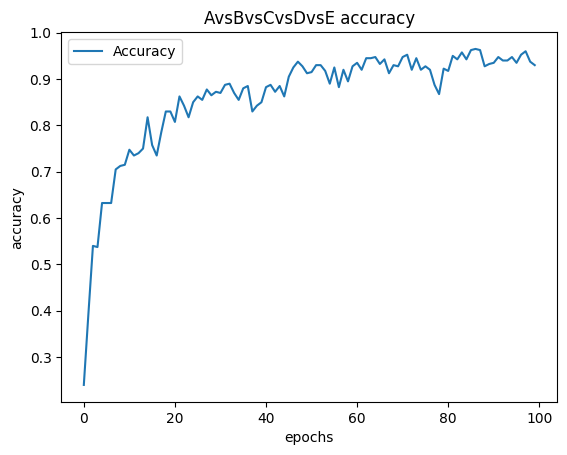

In [54]:
plt.plot(history.history['accuracy'])
plt.title('AvsBvsCvsDvsE accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy'],loc='best')
plt.show()

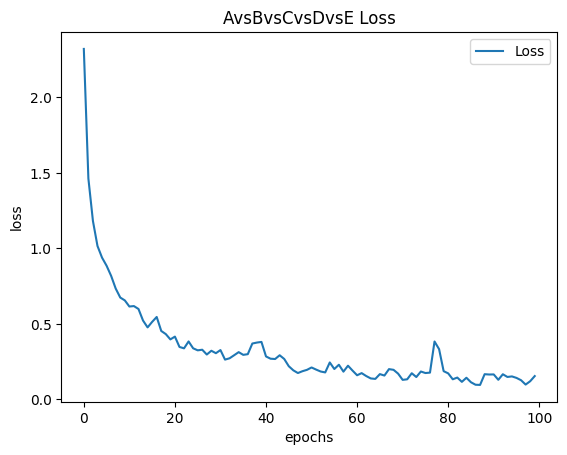

In [55]:
plt.plot(history.history['loss'])
plt.title('AvsBvsCvsDvsE Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Loss'],loc='best')
plt.show()

In [56]:
y_pred=model.predict(X_test).round()

4/4 [==============================] - 1s 13ms/step


In [57]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.00%


In [58]:
y_pred

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0.

In [59]:
y_pred=np.argmax(y_pred,axis=1)

In [60]:
y_pred

array([2, 0, 3, 1, 1, 2, 3, 1, 0, 4, 0, 1, 4, 0, 3, 3, 4, 0, 3, 4, 4, 4,
       2, 3, 0, 4, 4, 2, 1, 3, 4, 3, 4, 1, 0, 3, 4, 0, 2, 0, 3, 0, 4, 1,
       0, 0, 0, 0, 2, 0, 0, 1, 1, 4, 1, 0, 3, 0, 4, 0, 4, 2, 3, 4, 0, 0,
       4, 0, 2, 3, 3, 3, 2, 4, 3, 3, 2, 0, 4, 4, 0, 0, 4, 1, 2, 0, 1, 4,
       3, 3, 2, 4, 3, 3, 4, 3, 0, 0, 4, 0], dtype=int64)

In [61]:
actual=y_test
predicted=y_pred

In [62]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [63]:
confusion_matrix

array([[28,  0,  0,  0,  0],
       [ 1, 12,  0,  1,  0],
       [ 0,  0,  7,  1,  2],
       [ 0,  0,  4, 20,  0],
       [ 0,  0,  1,  0, 23]], dtype=int64)

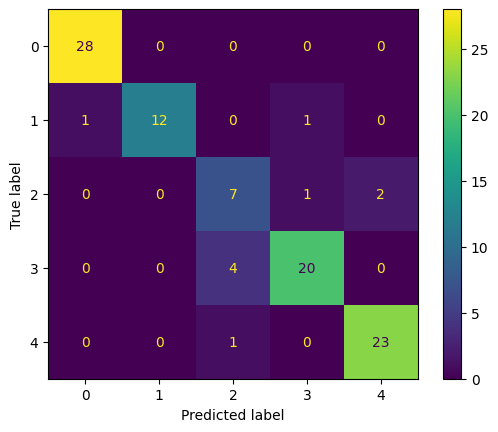

In [64]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.86      0.92        14
           2       0.58      0.70      0.64        10
           3       0.91      0.83      0.87        24
           4       0.92      0.96      0.94        24

    accuracy                           0.90       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.91      0.90      0.90       100

